# Exercise 3.3

> Tumor counts: A cancer laboratory is estimating the rate of tumorigenesis in two strains of mice, A and B. They have tumor count data for 10 mice in strain $A$ and 13 mice in strain $B$. Type $A$ mice have been well studied, and information from other laboratories suggests that type $A$ mice have tumor counts that are approximately Poisson-distributed with a mean of 12. Tumor count rates for type $B$ mice are unknown, but type $B$ mice are
related to type $A$ mice. The observed tumor counts for the two populations are

>$$
\begin{align}
y_A &= (12, 9, 12, 14, 13, 13, 15, 8, 15, 6);\\
y_B &= (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7).
\end{align}
$$

##### Problem A

> Find the posterior distributions, means, variances and 95% quantilebased confidence intervals for $\theta_A$ and $\theta_B$, assuming a Poisson sampling distribution for each group and the following prior distribution:

>$$
\begin{align}
\theta_A &\sim gamma(120,10)\\
\theta_B &\sim gamma(12,1)\\
p(\theta_A, \theta_B) &= p(\theta_A)\cdot p(\theta_B).
\end{align}
$$

##### Solution

We will use conjugate family Gamma-Poisson:

$$
\begin{align}
gamma(\theta|a, b) &= \frac{b^a}{\Gamma(a)}\theta^{a-1}e^{-b\theta};\\
pois(Y_i|\theta) &= \frac{\theta^{Y_i} e^{-\theta}}{Y_i!};
\end{align}
$$

where:

 - $b$ is interpreted as the number of prior observations (rate in R gamma function);
 - $a$ is interpreted as the sum of counts from $b$ prior observations (shape in R gamma function);

Then posterior distribution:

$$
\begin{align}
\theta &\sim gamma(a + \sum_{i=1}^{n}Y_i, b + n)
\end{align}
$$

In [1]:
y_A <- c(12,9,12,14,13,13,15,8,15,6)
a_A <- 120; b_A <- 10

y_B <- c(11,11,10,9,9,8,7,10,6,8,8,9,7)
a_B <- 12; b_B <- 1

a_ci <- pgamma(c(0.025, 0.975), shape = a_A + sum(y_A), rate = b_A + length(y_A))

posterior <- function(prior_a, prior_b, data) {
    posterior_a = prior_a + sum(data) 
    posterior_b = prior_b + length(data)
    ci <- pgamma(c(0.025, 0.975), shape=posterior_a, rate=posterior_b)
    mean <- posterior_a/posterior_b
    var <- posterior_a/(posterior_b^2)
    
    list(
        mean=mean,
        var=var,
        ci=ci,
        posterior_a=posterior_a,
        posterior_b=posterior_b)
}

Solve for A:

In [2]:
A <- posterior(a_A, b_A, y_A); A[c('mean', 'var', 'ci')]

$mean
[1] 11.85

$var
[1] 0.5925

$ci
[1]  0.000000e+00 6.798122e-165

Solve for B:

In [3]:
B <- posterior(a_B, b_B, y_B); B[c('mean', 'var', 'ci')]

$mean
[1] 8.928571

$var
[1] 0.6377551

$ci
[1] 3.827671e-267  5.475617e-74

##### Problem B

> Compute and plot the posterior expectation of $\theta_B$ under the prior distribution
$\theta_B ∼ gamma(12 \times n_0, n_0)$ for each value of $n_0 \in \{1, 2, ... , 50\}$. Describe what sort of prior beliefs about $\theta_B$ would be necessary in order for the posterior expectation of $\theta_B$ to be close to that of $\theta_A$.

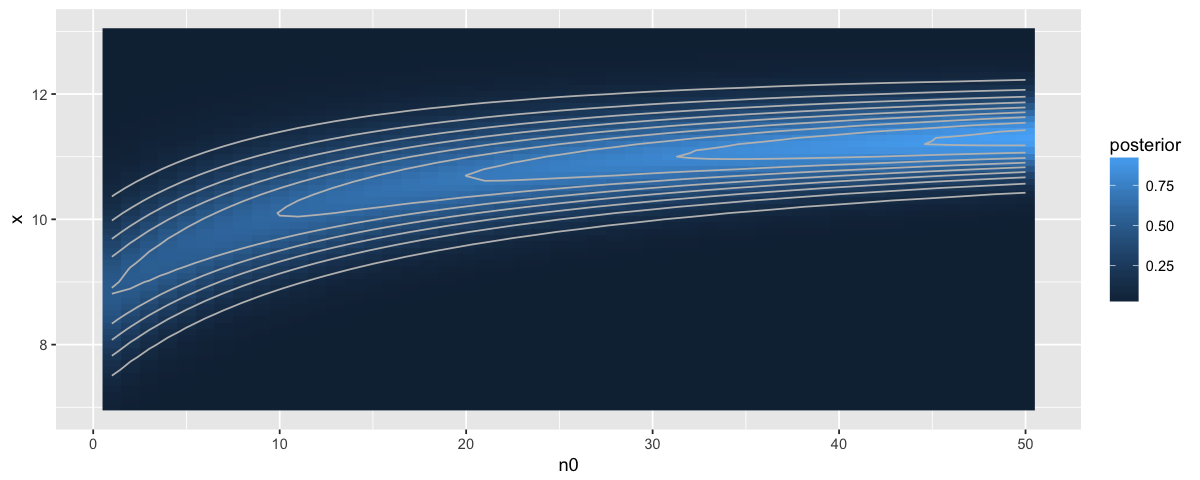

In [5]:
options(repr.plot.width=10, repr.plot.height=4)
library(ggplot2)
library(dplyr)

data <- expand.grid(x=seq(from=7, to=13, by=0.1), n0=1:50) %>%
    mutate(posterior = dgamma(x, sum(y_B) + 12*n0, rate=n0 + length(y_B)))

ggplot(data, aes(x=n0, y=x, z=posterior)) +
    geom_raster(aes(fill = posterior)) +
    geom_contour(colour = "gray")

##### Problem C
> c) Should knowledge about population $A$ tell us anything about population $B$? Discuss whether or not it makes sense to have $p(\theta_A, \theta_B) = p(\theta_A)\cdot p(\theta_B)$.

##### Solution

If $p(\theta_A)$ and $p(\theta_B)$ are independent then $p(\theta_A | \theta_B) = p(\theta_A)$ and hence:

$$
\begin{align}
p(\theta_A, \theta_B) &= p(\theta_A | \theta_B) \cdot p(\theta_B)\\
                      &= p(\theta_A)\cdot p(\theta_B)
\end{align}
$$

If random variables are independent then knowledge about one variable does not tell us anything about another variable.